In [0]:
# Install TensorFlow
#!pip install tensorflow

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.2.0


In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create Data

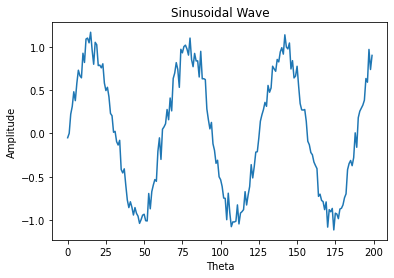

In [0]:
# make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.title("Sinusoidal Wave")
plt.xlabel("Theta")
plt.ylabel("Amplitude")
plt.show()

In [0]:
# let's see if we can use T past values to predict the next value
T = 10 # 10 previous time steps to predict the next time step
X = []# Using fixed size numpy arrays would probably be better
Y = []

# Final target index: len(series) - 1
# Final t: len(series) - T - 1
# Final target index: Final t + T
# If we plug in value of little t ...
# Final target index: [len(series) - T - 1] + T
# Final target index: len(series) - 1
for t in range(len(series) - T): # 0 to len(series) - T - 1
  x = series[t:T+t] # t to t + T - 1
  X.append(x)
  y = series[t+T] # t + T
  Y.append(y)

X = np.array(X).reshape(-1, T) # Change from N x D to N x T
Y = np.array(Y)
N = len(X)
print(N)
print(X.shape)
print(Y.shape)
X_train = X[:-N//2]
X_test = X[-N//2:]
Y_train = Y[:-N//2]
Y_test = Y[-N//2:]
print(X_train.shape, ",",X_test.shape,",",Y_train.shape,",", Y_test.shape)

190
(190, 10)
(190,)
(95, 10) , (95, 10) , (95,) , (95,)


# Build Model

In [0]:
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i, x)

model.compile(optimizer=Adam(lr=0.1),
              loss='mse',
               metrics=['accuracy'])

In [0]:
r = model.fit(X_train, Y_train,
              validation_data = (X_test, Y_test),
              epochs=90)

Epoch 1/90
3/3 [==============================] - 0s 32ms/step - loss: 0.9772 - accuracy: 0.0000e+00 - val_loss: 0.3893 - val_accuracy: 0.0000e+00
Epoch 2/90
3/3 [==============================] - 0s 13ms/step - loss: 0.7535 - accuracy: 0.0000e+00 - val_loss: 0.4489 - val_accuracy: 0.0000e+00
Epoch 3/90
3/3 [==============================] - 0s 12ms/step - loss: 0.3106 - accuracy: 0.0000e+00 - val_loss: 0.1068 - val_accuracy: 0.0000e+00
Epoch 4/90
3/3 [==============================] - 0s 14ms/step - loss: 0.1966 - accuracy: 0.0000e+00 - val_loss: 0.2297 - val_accuracy: 0.0000e+00
Epoch 5/90
3/3 [==============================] - 0s 12ms/step - loss: 0.2675 - accuracy: 0.0000e+00 - val_loss: 0.0675 - val_accuracy: 0.0000e+00
Epoch 6/90
3/3 [==============================] - 0s 14ms/step - loss: 0.0650 - accuracy: 0.0000e+00 - val_loss: 0.1022 - val_accuracy: 0.0000e+00
Epoch 7/90
3/3 [==============================] - 0s 13ms/step - loss: 0.1065 - accuracy: 0.0000e+00 - val_loss: 0.101

# Evaluate Model

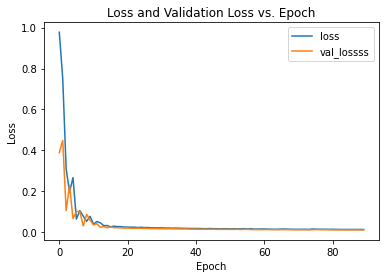

In [0]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Validation Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

In [0]:
# Single step forecast (wrong way)
predictions_test = []
i = -N//2
while (len(predictions_test) < len(Y_test)):
  p = model.predict(X[i].reshape(1, -1))[0,0]
  i += 1

  predictions_test.append(p)

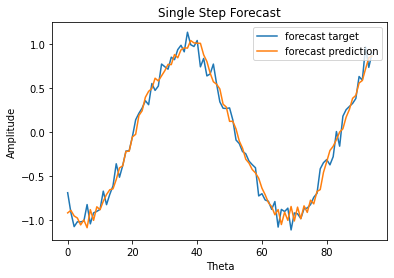

In [0]:
plt.plot(Y_test, label='forecast target')
plt.plot(predictions_test, label='forecast prediction')
plt.title("Single Step Forecast")
plt.ylabel('Amplitude')
plt.xlabel('Theta')
plt.legend()

In [0]:
# Multi step forecast - uses predictions for making future predictions
predictions_test = []

# Last train input
x_last = X[-N//2]

while (len(predictions_test) < len(Y_test)):
  p = model.predict(x_last.reshape(1, -1))[0,0]
  i += 1

  predictions_test.append(p)

  # Shift x_last vector of T values by 1 value to the left
  x_last = np.roll(x_last, -1)
  # Make last x_last element the prediction
  x_last[-1] = p

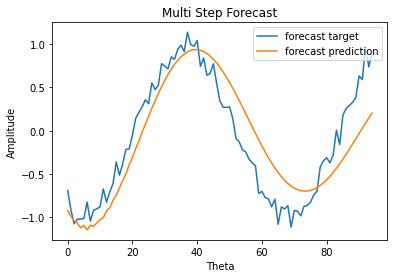

In [0]:
plt.plot(Y_test, label='forecast target')
plt.plot(predictions_test, label='forecast prediction')
plt.title("Multi Step Forecast")
plt.ylabel('Amplitude')
plt.xlabel('Theta')
plt.legend()